<a href="https://colab.research.google.com/github/santiagonajera/optimizacionInventrios/blob/main/ClasificacionAbc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clasificación ABC Mejorada:
      Ítem  Unidades Totales Proyectadas  Precio  Ventas Totales en Dólares  \
6   ITEM 7                       1191216     4.8                  5717836.8   
1   ITEM 2                       1354954     3.7                  5013329.8   
3   ITEM 4                       1171438     4.1                  4802895.8   
2   ITEM 3                       1045328     3.2                  3345049.6   
9  ITEM 10                        637668     5.2                  3315873.6   
4   ITEM 5                        746446     4.4                  3284362.4   
0   ITEM 1                        748732     4.3                  3219547.6   
8   ITEM 9                        669530     4.2                  2812026.0   
5   ITEM 6                        657122     3.8                  2497063.6   
7   ITEM 8                        668136     3.4                  2271662.4   

   Ventas Acumuladas  Porcentaje Acumulado Categoría ABC  
6          5717836.8             15.760453 

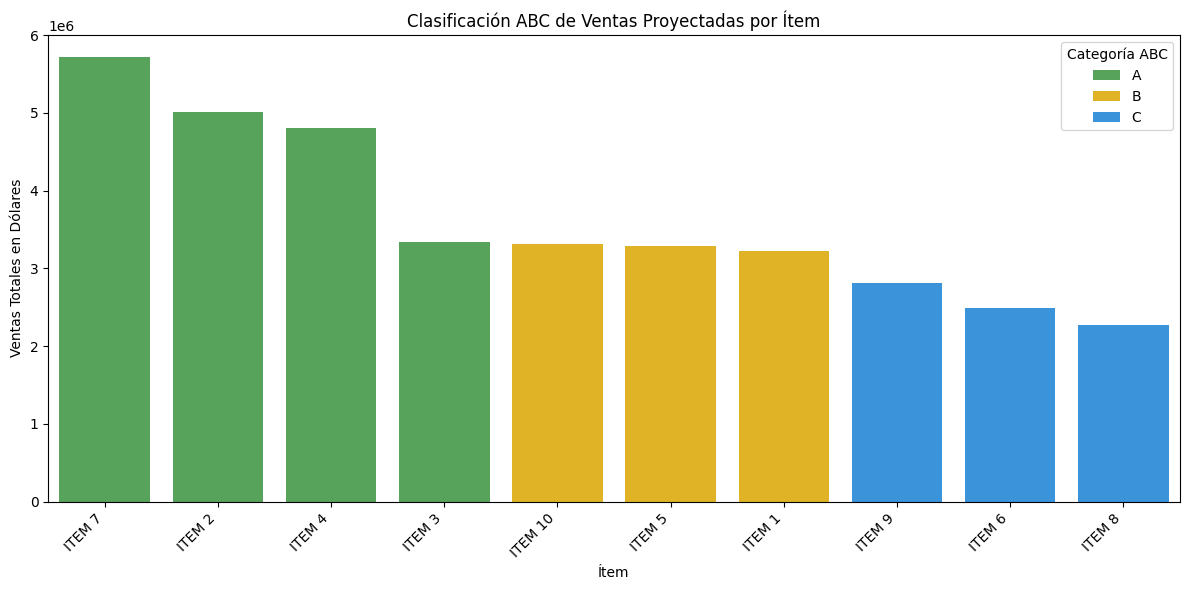

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ruta del archivo desde GitHub
file_path = 'https://github.com/santiagonajera/optimizacionInventrios/raw/refs/heads/main/EjemploClases-Eco.xlsx'

# Cargar las hojas relevantes
forecast_data = pd.read_excel(file_path, sheet_name='Forecast')
price_cost_data = pd.read_excel(file_path, sheet_name='Precios-Costos')

# Asegurar consistencia en nombres de columnas
forecast_data.rename(columns={"ITEM": "Ítem"}, inplace=True)
price_cost_data.rename(columns={"ITEM": "Ítem"}, inplace=True)

# Sumar las ventas proyectadas por unidad para cada artículo
forecast_data["Unidades Totales Proyectadas"] = forecast_data.iloc[:, 1:].sum(axis=1)

# Fusionar los datos de forecast y precios
merged_data = pd.merge(forecast_data[["Ítem", "Unidades Totales Proyectadas"]],
                       price_cost_data[["Ítem", "Precio"]],
                       on="Ítem")

# Calcular las ventas proyectadas en dólares
merged_data["Ventas Totales en Dólares"] = merged_data["Unidades Totales Proyectadas"] * merged_data["Precio"]

# Clasificación ABC
merged_data = merged_data.sort_values(by="Ventas Totales en Dólares", ascending=False)
merged_data["Ventas Acumuladas"] = merged_data["Ventas Totales en Dólares"].cumsum()
total_sales = merged_data["Ventas Totales en Dólares"].sum()
merged_data["Porcentaje Acumulado"] = (merged_data["Ventas Acumuladas"] / total_sales) * 100

# Asignar categorías ABC
categories = ["A", "B", "C"]
merged_data["Categoría ABC"] = pd.cut(merged_data["Porcentaje Acumulado"],
                                      bins=[0, 60, 80, 100],
                                      labels=categories,
                                      include_lowest=True)

# Crear un DataFrame con encabezados bien formateados
result_df = merged_data[["Ítem", "Unidades Totales Proyectadas", "Precio", "Ventas Totales en Dólares",
                         "Ventas Acumuladas", "Porcentaje Acumulado", "Categoría ABC"]]

# Mostrar el DataFrame mejorado
print("Clasificación ABC Mejorada:")
print(result_df)

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=merged_data, x="Ítem", y="Ventas Totales en Dólares", hue="Categoría ABC", dodge=False, palette=['#4CAF50', '#FFC107', '#2196F3'])
plt.title("Clasificación ABC de Ventas Proyectadas por Ítem")
plt.xlabel("Ítem")
plt.ylabel("Ventas Totales en Dólares")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Categoría ABC")
plt.tight_layout()
plt.show()
